# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data and Check Summary

In [23]:
df = pd.read_csv('Course Data.csv')

In [24]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,244,51,2,880606923


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45362 entries, 0 to 45361
Data columns (total 4 columns):
user_id      45362 non-null int64
item_id      45362 non-null int64
rating       45362 non-null int64
timestamp    45362 non-null int64
dtypes: int64(4)
memory usage: 1.4 MB


In [26]:
course_title = pd.read_csv('course_title.csv')
course_title.head()

,item_id,title
0,1,Circuits and Electronics
1,2,Introduction to Computer Science and Programming
2,3,Introduction to Solid State Chemistry
3,4,Introduction to Computer Science
4,5,Health in Numbers: Quantitative Methods in Cli...


In [27]:
data = pd.merge(df,course_title,on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,HarvardX for Alumni: Explorations in Learning
1,290,50,5,880473582,HarvardX for Alumni: Explorations in Learning
2,79,50,4,891271545,HarvardX for Alumni: Explorations in Learning
3,2,50,5,888552084,HarvardX for Alumni: Explorations in Learning
4,8,50,5,879362124,HarvardX for Alumni: Explorations in Learning


## Exploratory Data Analysis

Create a dataframe with average rating and no. of ratings 

In [28]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
History of the Book: Making and Meaning in the Medieval Manuscript    4.466102
HarvardX for Alumni: Explorations in Learning                         4.359589
Foundations of Development Policy: Advanced Development Economics     4.344000
The American Dream for the Next Generation                            4.292929
Light, Spike, and Sight: The Neuroscience of Vision                   4.289744
Name: rating, dtype: float64

In [29]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Introduction to Computer Science and Programming    1587
Circuits and Electronics                            1075
Introduction to Solid State Chemistry                972
Introduction to Computer Science                     814
The Analytics Edge                                   735
Name: rating, dtype: int64

In [30]:
rating_course = pd.DataFrame(data.groupby('title')['rating'].mean())
rating_course.head()

,rating
title,
A Global History of Architecture,3.869295
A New National Culture,3.320988
Advanced Introductory Classical Mechanics,3.063218
Advanced Statistics for the Life Sciences,3.804124
AnatomyX: Musculoskeletal Cases,4.062500


In [31]:
rating_course['no_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
rating_course.head()

,rating,no_of_ratings
title,,
A Global History of Architecture,3.869295,482
A New National Culture,3.320988,81
Advanced Introductory Classical Mechanics,3.063218,174
Advanced Statistics for the Life Sciences,3.804124,97
AnatomyX: Musculoskeletal Cases,4.062500,176


## Visualisation

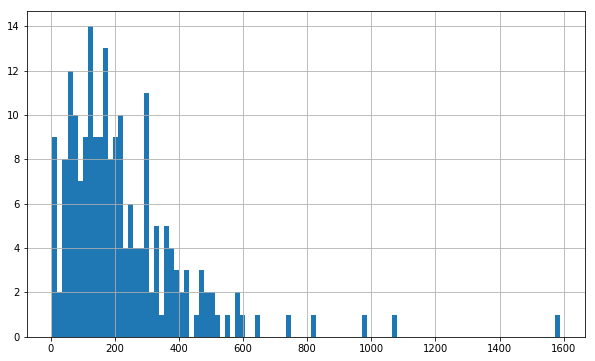

In [32]:
plt.figure(figsize=(10,6))
rating_course['no_of_ratings'].hist(bins=100)

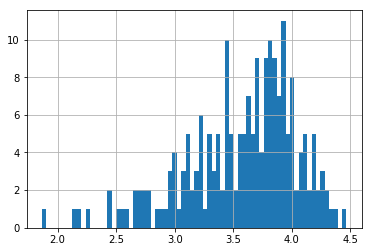

In [33]:
rating_course['rating'].hist(bins=70)

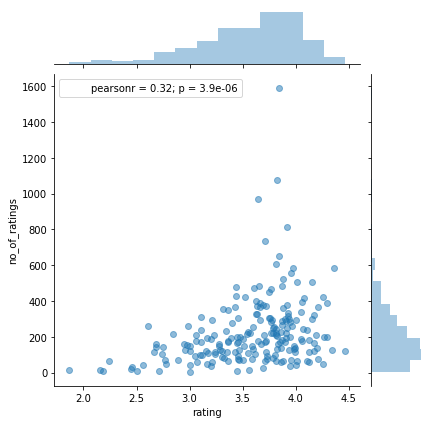

In [34]:
sns.jointplot(x='rating',y='no_of_ratings',data=rating_course,alpha=0.5)

## Create a Simple Recommender System for Similiar Courses based on rating

In [35]:
coursemat = data.pivot_table(index='user_id',columns='title',values='rating')
coursemat.head()

title,A Global History of Architecture,A New National Culture,Advanced Introductory Classical Mechanics,Advanced Statistics for the Life Sciences,AnatomyX: Musculoskeletal Cases,Atomic and Optical Physics: Atom-Light Interactions 1 -- Matrix elements and quantized field,Atomic and Optical Physics: Atom-Light Interactions 2: Line Broadening and Two-Photon Transitions,Atomic and Optical Physics: Atomic structure and atoms in external field,Atomic and Optical Physics: Coherence,Atomic and Optical Physics: Resonance,...,United States Health Policy,Unlocking the Immunity to Change,Unlocking the Immunity to Change: A New Approach to Personal Improvement,User Innovation: A Path to Entrepreneurship,"Visualizing Japan (1850s-1930s): Westernization, Protest, Modernity",World Religions Through Their Scriptures: Islam,World Religions Through their Scriptures: Buddhism,World Religions Through their Scriptures: Christianity,World Religions Through their Scriptures: Hinduism,"World Religions Through their Scriptures: Religious Literacy, Traditions and Scriptures"
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,3.0,2.666667,2.0,3.0,3.0,3.0,5.0,5.0,3.0,...,3.0,4.0,4.0,5.0,4.0,NaN,4.0,2.0,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,4.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
rating_course.sort_values('no_of_ratings',ascending=False)

,rating,no_of_ratings
title,,
Introduction to Computer Science and Programming,3.838689,1587
Circuits and Electronics,3.825116,1075
Introduction to Solid State Chemistry,3.639918,972
Introduction to Computer Science,3.916462,814
The Analytics Edge,3.711565,735
"Visualizing Japan (1850s-1930s): Westernization, Protest, Modernity",3.844854,651
Introduction to Biology: Secret of Life,3.817881,604
HarvardX for Alumni: Explorations in Learning,4.359589,584
Molecular Biology: DNA Replication and Repair,3.974271,583


Choose any two courses: Introduction to Computer Science and Programming(ICSP), Calculus: Coordinate Systems and Infinite Series(CSIS)

In [37]:
ICSP_user_rating = coursemat['Introduction to Computer Science and Programming']
CSIS_user_rating = coursemat['Calculus: Coordinate Systems and Infinite Series']
CSIS_user_rating.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: Calculus: Coordinate Systems and Infinite Series, dtype: float64

## Correlating the ratings of course with other courses

In [38]:
similar_to_ICSP = coursemat.corrwith(ICSP_user_rating)
similar_to_CSIS = coursemat.corrwith(CSIS_user_rating)

C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


## Frame the corr data and clean the NaN

In [39]:
corr_ICSP = pd.DataFrame(similar_to_ICSP,columns=['Correlation'])
corr_ICSP.dropna(inplace=True)
corr_ICSP.head()

,Correlation
title,
A Global History of Architecture,0.220887
A New National Culture,0.348168
Advanced Introductory Classical Mechanics,0.229415
Advanced Statistics for the Life Sciences,-0.027161
AnatomyX: Musculoskeletal Cases,0.179630


In [40]:
corr_ICSP.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Introduction to Computer Science and Programming,1.000000
Poetry in America: The Civil War and Its Aftermath,0.766179
Poetry in America: Modernism,0.674640
Fundamentals of Clinical Trials,0.463349
The Last Empire,0.442292
Mobile Application Experiences: Building Mobile Apps,0.397521
Mechanical Behavior of Materials: Time Dependent Behavior and Failure,0.394999
Data Analysis for Genomics: Statistics and R for the Life Sciences,0.392913
World Religions Through their Scriptures: Buddhism,0.390305


In [41]:
corr_CSIS = pd.DataFrame(similar_to_CSIS,columns=['Correlation'])
corr_CSIS.dropna(inplace=True)
corr_CSIS.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Calculus: Coordinate Systems and Infinite Series,1.000000
Molecular Biology: Transcription and Transposition,1.000000
Data Analysis for Genomics: Introduction to High-Dimensional Data Analysis,1.000000
Global Health: Case Studies from a Biosocial Perspective,0.944911
Mechanical Behavior of Materials: Time Dependent Behavior and Failure,0.904534


# Advanced Recommender System

## Collaborative Filtering
In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). The algorithm has the ability to do feature learning on its own, which means that it can start to learn for itself what features to use.

CF can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering.

We will implement Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity.

Let's Check no. of users and no. of courses 

In [47]:
n_users = data.user_id.nunique()
n_courses = data.item_id.nunique()

print('No.of Users: ' + str(n_users))
print('No. of Courses: ' + str(n_items))

No.of Users: 944
No. of Courses: 290


## Train Test Split

In [48]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Memory-Based Collaborative Filtering
Memory-Based Collaborative Filtering approaches can be divided into two main sections: user-item filtering and item-item filtering.
#Item-Item Collaborative Filtering: “Users who liked this item also liked …”
#User-Item Collaborative Filtering: “Users who are similar to you also liked …”

In [49]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [50]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
course_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [54]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'course':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [55]:
course_prediction = predict(train_data_matrix, course_similarity, type='course')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

## Evaluation 

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [57]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Course-based CF RMSE: ' + str(rmse(course_prediction, test_data_matrix)))

User-based CF RMSE: 2.910434234232812
Course-based CF RMSE: 3.179931206871016


## Model Based Collaborative Filtering

In [59]:
sparsity=round(1.0-len(data)/float(n_users*n_items),3)
print('The sparsity level of CourseData is ' +  str(sparsity*100) + '%')

The sparsity level of CourseData is 83.39999999999999%


In [60]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.770485972044491
